## Predicting the Next Hot Housing Markets - Data Story

##### Looking at the data available, I asked some initial questions to give me a better understanding of the trends, and inform my next steps for creating a predictive model.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(color_codes=True)

In [3]:
np.random.seed(sum(map(ord, "regression")))

In [4]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [5]:
homes1 = pd.DataFrame.from_csv('data/Zip_Zhvi_Summary_AllHomes.csv', index_col=None)
homes1.head()

,Date,RegionID,RegionName,State,Metro,County,City,SizeRank,Zhvi,MoM,QoQ,YoY,5Year,10Year,PeakMonth,PeakQuarter,PeakZHVI,PctFallFromPeak,LastTimeAtCurrZHVI
0,2017-05-31,61639,10025,NY,New York,New York,New York,0,1178700,0.030602,0.051097,0.108739,0.088801,0.049093,2017-05,2017-Q2,1178700,0.000000,2017-05
1,2017-05-31,84654,60657,IL,Chicago,Cook,Chicago,1,327700,0.005523,0.017070,0.031152,0.045528,0.002162,2017-05,2017-Q2,327700,0.000000,2017-05
2,2017-05-31,84616,60614,IL,Chicago,Cook,Chicago,2,401900,-0.008633,-0.040124,-0.005198,0.045068,0.002856,2017-02,2017-Q1,418700,-0.040124,2016-09
3,2017-05-31,93144,79936,TX,El Paso,El Paso,El Paso,3,114800,0.000872,-0.001739,0.025000,0.002280,-0.011594,2007-12,2007-Q4,131100,-0.124333,2006-09
4,2017-05-31,84640,60640,IL,Chicago,Cook,Chicago,4,205700,-0.004356,0.002437,0.050562,0.048406,-0.014355,2007-02,2007-Q1,237800,-0.134987,2003-06


In [6]:
homes2 = pd.DataFrame.from_csv('data/Zip_Zhvi_AllHomes.csv', index_col=None)
homes2.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1128500,1133300,1132900,1147300,1149800.0,1132700,1121400,1123000,1143700,1178700
1,84654,60657,Chicago,IL,Chicago,Cook,2,146700.0,146500.0,146300.0,...,318600,318200,318100,318700,320200.0,321000,322200,323800,325900,327700
2,84616,60614,Chicago,IL,Chicago,Cook,3,198000.0,195500.0,194200.0,...,400700,401900,406000,414000,417800.0,417700,418700,414100,405400,401900
3,93144,79936,El Paso,TX,El Paso,El Paso,4,70800.0,71000.0,71000.0,...,113700,113800,113800,114100,114500.0,114900,115000,114700,114700,114800
4,84640,60640,Chicago,IL,Chicago,Cook,5,102300.0,101300.0,100700.0,...,200000,198800,199200,200100,201500.0,203200,205200,206700,206600,205700


## Exploring correlations in the data with scatterplots:

##### Question 1 - Is there any correlation between the 10 year growth in home value and the current ZHVI value?

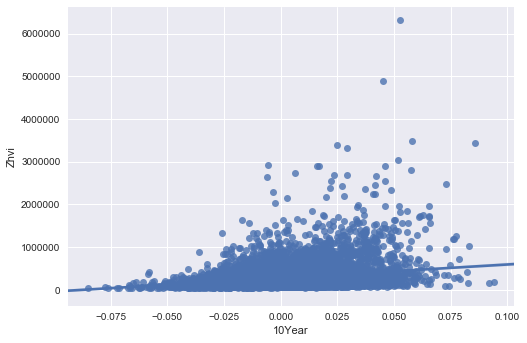

In [7]:
sns.regplot(x="10Year", y="Zhvi", data=homes1)

##### Question 2 - Is there any correlation between the 10 year growth in home value and the size of the market?

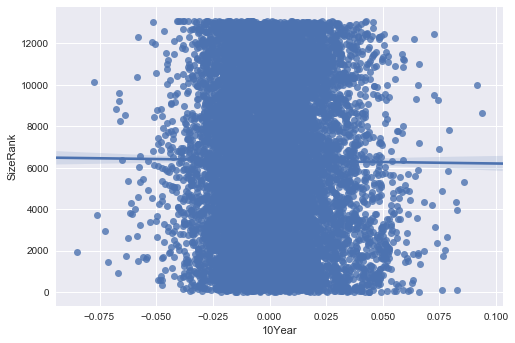

In [8]:
sns.regplot(x="10Year", y="SizeRank", data=homes1)

##### Question 3 - What is the correlation between the 10 year growth in home value and the 5 year growth in home value?

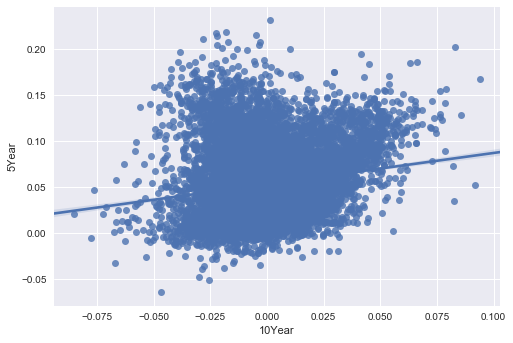

In [9]:
sns.regplot(x="10Year", y="5Year", data=homes1)

##### The scatterplots show me a few interesting trends: 

1. There is a small positive correlation between the current value of a home, and how much that home's value has grown over the last 10 years, which makes sense.

2. There is no correlation between the size of the region and the 10-year growth of the home value.  

3. There is a correlation between how much home value has grown in the last 5 years, and how much it has grown in the last 10 years, which makes complete sense, since there is overlap in that data.

## Observing overall trends in the housing market by state with line graphs:

In [10]:
# Transposing the data

h = homes2
h = h.T
h.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104
2016-08,1128500,318600,400700,113700,200000,161200,1102600,297400,573700,160000,...,218500,473200,168900,320500,207300,609000,504900,172100,790600,176300
2016-09,1133300,318200,401900,113800,198800,160500,1105300,299000,584600,160700,...,219700,480800,169800,319300,209800,613500,498200,172700,791700,177000
2016-10,1132900,318100,406000,113800,199200,160600,1109200,301200,595600,162000,...,220300,483000,170300,317500,211700,625300,494400,174200,790100,178300
2016-11,1147300,318700,414000,114100,200100,160600,1117800,303400,605800,162700,...,220600,489200,171100,317600,212300,638500,493000,176200,785900,179700
2016-12,1.1498e+06,320200,417800,114500,201500,159100,1.1256e+06,304700,612600,161500,...,221700,495000,171400,316100,213100,648400,498900,176900,784500,180700
2017-01,1132700,321000,417700,114900,203200,156900,1127700,305500,613200,159100,...,223100,487200,171300,310800,213500,655100,509400,176100,782800,181900
2017-02,1121400,322200,418700,115000,205200,154600,1128600,307300,617000,156300,...,223700,481300,172000,305700,213900,650400,522500,174400,774000,183300
2017-03,1123000,323800,414100,114700,206700,153400,1132000,309700,628700,155100,...,223500,490100,173800,304600,215200,633700,534600,172000,765600,184300
2017-04,1143700,325900,405400,114700,206600,154100,1138300,312000,643100,156400,...,225000,496800,174900,305500,216800,620200,544400,170000,768600,184400
2017-05,1178700,327700,401900,114800,205700,156200,1144000,313700,653400,158800,...,226700,494900,175600,306900,217600,612900,548500,168900,773500,184500


##### Question 4 - How has the average home value in the US housing market changed over the last 20 years?

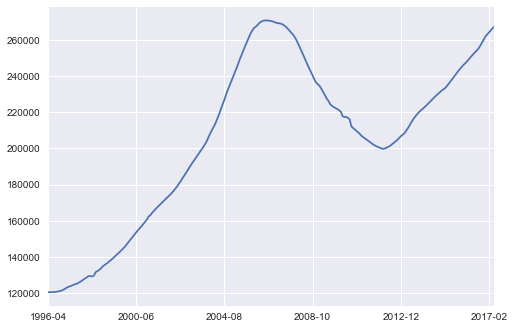

In [11]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h.mean()
h = h.T
h.plot(kind = 'line')

##### Question 5 - How has the average home value changed over the last 20 years for each state?

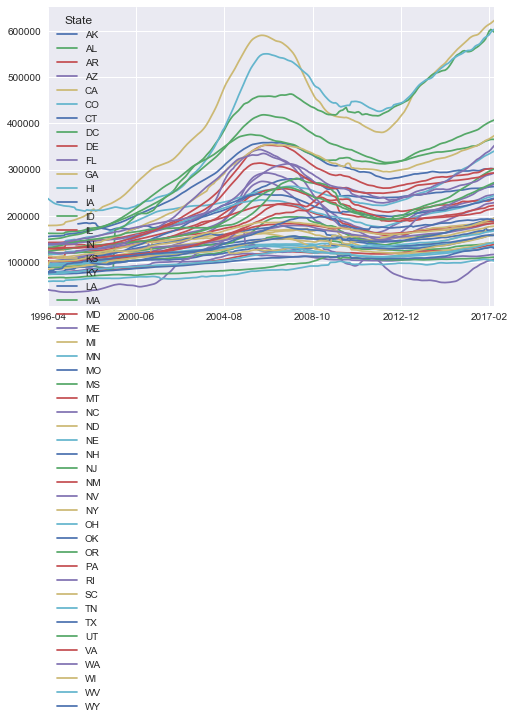

In [12]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

##### Question 5 (cont'd) - What is the total percent growth in housing value by state for the last 20 years?

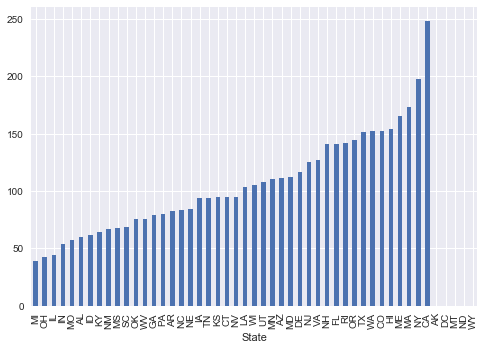

In [13]:
h = homes2
h = h.groupby('State').mean()
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h.round(2)
h.Percent_Growth.plot(kind = 'bar')

##### Question 6 - For the slowest growing states for the last 20 years, what does their growth look like over time?

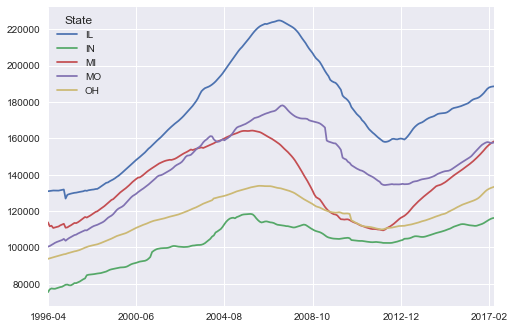

In [14]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'MI') | (h.State == 'MO') | (h.State == 'OH') | (h.State == 'IL') | (h.State == 'IN')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

##### Question 7 - For the fastest growing states for the last 20 years, what does their growth look like over time?

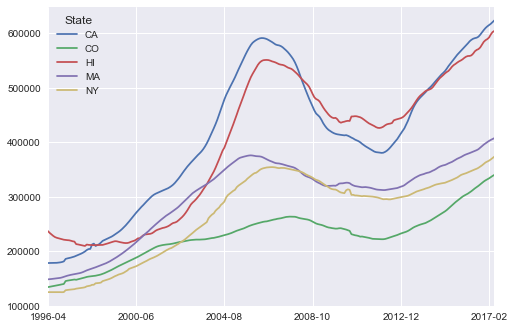

In [15]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'CA') | (h.State == 'NY') | (h.State == 'MA') | (h.State == 'HI') | (h.State == 'CO')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

##### Question 8 - Compare the fastest and slowest growing states on the same plot.

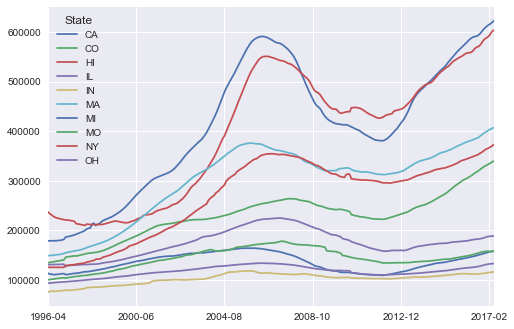

In [16]:
h = homes2.drop(['RegionID', 'RegionName', 'City', 'Metro', 'CountyName', 'SizeRank'], axis = 1)
h = h[(h.State == 'CA') | (h.State == 'NY') | (h.State == 'MA') | (h.State == 'HI') | (h.State == 'CO') | (h.State == 'MI') | (h.State == 'MO') | (h.State == 'OH') | (h.State == 'IL') | (h.State == 'IN')]
h = h.groupby(h.State).mean()
h = h.T
h.plot(kind = 'line')

##### The line graphs of the home value over the last 20 years reveals interesting trends, both overall and by state:

1. The housing bubble of the mid-2000's and subsequent crash is the most apparent trend which shows for the US data overall, as well as most of the state-level trends.  For the US overall, the home value has rebounded to roughly the peak level before the crash.

2. The 20-year growth varies significantly across states.  The fastest growing state, California, has seen 5x the growth of the slowest growing states.

3. The impact of the housing bubble, crash, and recovery vary quite a bit across states.  The states that have seen the most growth , especialy California and Hawaii, were more strongly impacted by the housing bubble and crash, but have also seen rapid growth since.  All of the top 5 growth markets have surpassed their peak values from the mid-2000's housing bubble.

4. The slowest growing states, on the other hand, showed less of a dip during the housing crisis, but have also been slower to recover.

5. All of the slowest growing states are in the midwest.  The fastest growing states tend to be coastal, with the exception of Colorado.


## Looking at fastest and slowest growing zip codes

##### Question 9 - What are the 10 slowest growing zip codes for the last 20 years?

In [17]:
h = homes2
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h.round(2)
h.head(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Percent_Growth
7835,75364,39577,Wiggins,MS,NaN,Stone,7836,122100.0,121800.0,121600.0,...,114500,110900,106900,102600.0,99900,98500,97100,95200,94100,-22.93
9632,78579,47390,Union City,IN,NaN,Randolph,9633,61700.0,62300.0,61500.0,...,55600,56300,56100,55100.0,53500,52000,50900,49900,49300,-20.10
4008,77037,44137,Maple Heights,OH,Cleveland,Cuyahoga,4009,68500.0,69500.0,69900.0,...,53400,54000,54100,54100.0,54700,55100,55200,55200,55400,-19.12
8461,77150,44405,Campbell,OH,Youngstown,Mahoning,8462,53000.0,51900.0,50800.0,...,36300,36900,37500,38100.0,38800,39900,41200,42400,43100,-18.68
9883,75207,39203,Jackson,MS,Jackson,Hinds,9884,40200.0,40700.0,41100.0,...,38400,36300,35300,35600.0,36000,35500,34500,33900,33400,-16.92
990,84368,60115,Dekalb,IL,Chicago,DeKalb,991,158100.0,159500.0,159800.0,...,134800,134000,133600,133900.0,134100,134300,135200,135900,136200,-13.85
12922,85224,61912,Ashmore,IL,Charleston,Coles,12923,91500.0,91400.0,91400.0,...,72500,72400,73400,75600.0,77600,78900,79800,79800,79300,-13.33
12615,85244,61943,Oakland,IL,Charleston,Coles,12616,92000.0,91900.0,91900.0,...,71500,72300,73500,75400.0,77300,78900,79900,80100,80000,-13.04
4550,77010,44110,Cleveland,OH,Cleveland,Cuyahoga,4551,49200.0,48800.0,48200.0,...,41100,41700,42100,42600.0,42800,42300,41900,42400,43200,-12.20
7253,84576,60548,Sandwich,IL,Chicago,DeKalb,7254,197900.0,199100.0,199200.0,...,173100,172500,171600,172200.0,173000,173600,174300,174600,174600,-11.77


##### Question 10 - What are the 10 fastest growing zips for the last 20 years?

In [18]:
h = homes2
h['Percent_Growth'] = (h['2017-05'] / h['1996-04'] - 1) * 100 
h = h.sort_values('Percent_Growth')
h = h[np.isfinite(h['Percent_Growth'])]
h = h.round(2)
h.tail(10)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,Percent_Growth
3123,97696,94306,Palo Alto,CA,San Jose,Santa Clara,3124,410900.0,415600.0,419500.0,...,2348700,2353400,2365300,2385700.0,2412000,2433000,2443900,2456600,2469200,500.92
5303,97691,94301,Palo Alto,CA,San Jose,Santa Clara,5304,562600.0,564400.0,570300.0,...,3291500,3316100,3332900,3357600.0,3390900,3412600,3419800,3426200,3437400,510.98
3592,65792,19125,Philadelphia,PA,Philadelphia,Philadelphia,3593,38200.0,38100.0,38000.0,...,217500,221400,224900,227000.0,228000,229200,231200,233200,235100,515.45
56,97565,94110,San Francisco,CA,San Francisco,San Francisco,57,210600.0,216300.0,221600.0,...,1254200,1261400,1280900,1305500.0,1315000,1322600,1338000,1346100,1344600,538.46
4158,58695,2215,Boston,MA,Boston,Suffolk,4159,84100.0,83700.0,82800.0,...,495800,500500,506400,513000.0,520000,526300,530000,533700,538200,539.95
1818,58642,2128,Boston,MA,Boston,Suffolk,1819,66400.0,65900.0,65600.0,...,396800,401300,406500,410800.0,413600,417500,423400,429600,435000,555.12
5850,60647,7310,Jersey City,NJ,New York,Hudson,5851,108700.0,107300.0,106900.0,...,649400,656500,670700,688000.0,704700,718700,726400,724700,719600,562.01
1628,96127,90291,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1629,246200.0,243300.0,241000.0,...,1619500,1622400,1629800,1633000.0,1628800,1627200,1627900,1631000,1634400,563.85
6911,58634,2120,Boston,MA,Boston,Suffolk,6912,84900.0,85400.0,86400.0,...,514600,514200,521600,541900.0,568800,586400,587400,586000,588600,593.29
296,60639,7302,Jersey City,NJ,New York,Hudson,297,87700.0,89500.0,90100.0,...,648500,664600,684700,700400.0,707400,713000,721300,728100,731700,734.32


##### Observations on zip codes:

1. The slowest growing zip codes line up pretty well with the slowest growing states, and the fastest growing zip codes line up pretty well with the fastest growing states.

2. The fastest growing zip codes are all near a major coastal metro area - NYC, Boston, LA, SF, and Philadelphia.

## Plotting prevalence of null values over time

##### Question 11 - How many null values are there for each month in the data?

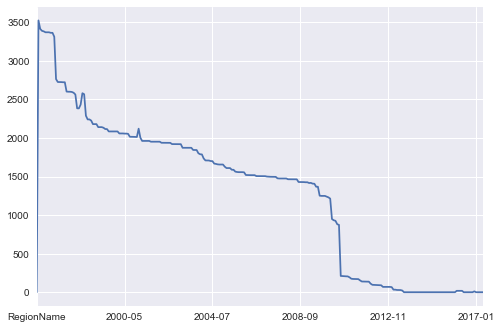

In [19]:
h = homes2.drop(['RegionID', 'State', 'City', 'Metro', 'CountyName', 'SizeRank', 'Percent_Growth'], axis = 1)
count_nan = len(h) - h.count()
count_nan.plot()

##### Looking at the occurences of null values across different columns of the data helps me think about my approach in creating a model:

Knowing exactly how much of the data is available across time is helpful.  If I want to look at the entire timeframe, I lose about 26% of the zip codes that don't have data.  I can try a few different timeframes to see which gives me the most accurate model.

## Summary & Next Steps

##### This initial data exploration helped me understand a few areas to explore next:

1. I will be looking more into metro areas and how various areas have fared over the years.

2. Another factor that seems to be worth exploring is a region's proximity to an ocean.  I will look for a dataset that breaks that down by zip code that I can merge with the housing data.

3. Other variables I want to explore include the average HHI for a region and rental values for a region.

4. I will also look at how specific regions have performed in the last housing bubble, the crash, and the recovery timeframes, to understand how volatile individual regions may be.